In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

In [3]:
print(f"Sentiment shape: {sentiment.shape} | Trader dataset shape: {trades.shape}")
print(f"Missing Values (Trades):\n{trades.isnull().sum()}")

Sentiment shape: (2644, 4) | Trader dataset shape: (18608, 16)
Missing Values (Trades):
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          1
Transaction Hash    1
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
dtype: int64


In [4]:
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['Timestamp'].dt.date

In [5]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [6]:
trades['is_win'] = trades['Closed PnL'] > 0

In [7]:
trades['is_long'] = trades['Side'].str.upper().str.contains('LONG|BUY')

daily_metrics = trades.groupby(['Account', 'date']).agg(
    daily_pnl=('Closed PnL', 'sum'),
    trades_per_day=('Trade ID', 'count'),
    avg_trade_size=('Size USD', 'mean'),
    win_rate=('is_win', 'mean'),
    long_ratio=('is_long', 'mean')
).reset_index()

In [8]:
final_data = daily_metrics.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)
final_data.rename(columns={'classification': 'sentiment'}, inplace=True)

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/tmp/ipython-input-3342793225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


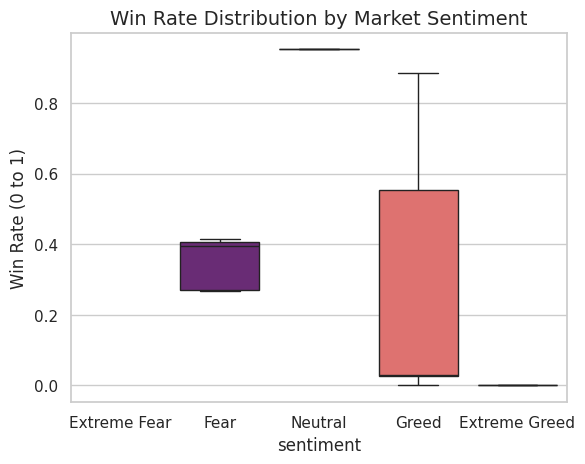

In [10]:
sns.boxplot(
    data=final_data.dropna(subset=['sentiment']),
    x='sentiment',
    y='win_rate',
    palette='magma',
    order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
)

plt.title('Win Rate Distribution by Market Sentiment', fontsize=14)
plt.ylabel('Win Rate (0 to 1)')
plt.show()

In [11]:
print("\n--- Final Merged Dataset Summary ---")
print(final_data[['date', 'daily_pnl', 'win_rate', 'sentiment']].head())


--- Final Merged Dataset Summary ---
         date     daily_pnl  win_rate      sentiment
0  2024-10-27 -3.275059e+05  0.025974          Greed
1  2025-02-19  1.927736e+06  0.405542           Fear
2  2024-03-09  0.000000e+00  0.000000  Extreme Greed
3  2024-07-03  1.455634e+05  0.951807        Neutral
4  2024-10-27  1.604505e+05  0.883721          Greed
